In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("C:\\Users\\arups\\OneDrive\\Desktop\\COLLECTION\\PROGRAMS\\TEST_CSVs\\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = df.iloc[: , 3:13]
y = df.iloc[: , -1]

In [4]:
geography = pd.get_dummies(X['Geography'] , drop_first=True).astype(int)
gender = pd.get_dummies(X['Gender'] , drop_first=True).astype(int)

In [5]:
X = pd.concat([X , geography , gender] , axis = 1)
X.drop(['Geography' , 'Gender'] , axis = 1 , inplace=True)

In [6]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [7]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [8]:
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout

In [10]:
classifier = Sequential()

In [11]:
#The Dense layer is a fully connected layer, which means that every neuron in the layer is connected to every neuron in the previous layer. 
classifier.add(Dense(units = 10 , kernel_initializer= 'he_normal' , activation='relu' , input_dim = 11))
classifier.add(Dropout(0.3))
classifier.add(Dense(units = 20 , kernel_initializer= 'he_normal' , activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units = 15 , kernel_initializer= 'he_normal' , activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 1 , kernel_initializer= 'glorot_uniform' , activation='sigmoid'))
# Here we use sigmoid means our output is in (range:0-1)

In [12]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 15)                315       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [14]:
model_history = classifier.fit(X_train_trf , y_train , validation_split=0.33 , batch_size=10,epochs = 10)

Epoch 1/10
536/536 [==============================] - 6s 7ms/step - loss: 0.6964 - accuracy: 0.7128 - val_loss: 0.4959 - val_accuracy: 0.7902
Epoch 2/10
536/536 [==============================] - 3s 5ms/step - loss: 0.5379 - accuracy: 0.7848 - val_loss: 0.4778 - val_accuracy: 0.7910
Epoch 3/10
536/536 [==============================] - 3s 5ms/step - loss: 0.4988 - accuracy: 0.7946 - val_loss: 0.4647 - val_accuracy: 0.7910
Epoch 4/10
536/536 [==============================] - 3s 5ms/step - loss: 0.4804 - accuracy: 0.7970 - val_loss: 0.4550 - val_accuracy: 0.7910
Epoch 5/10
536/536 [==============================] - 3s 5ms/step - loss: 0.4716 - accuracy: 0.7974 - val_loss: 0.4491 - val_accuracy: 0.7910
Epoch 6/10
536/536 [==============================] - 3s 5ms/step - loss: 0.4654 - accuracy: 0.7962 - val_loss: 0.4465 - val_accuracy: 0.7910
Epoch 7/10
536/536 [==============================] - 3s 5ms/step - loss: 0.4563 - accuracy: 0.8037 - val_loss: 0.4447 - val_accuracy: 0.7910
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


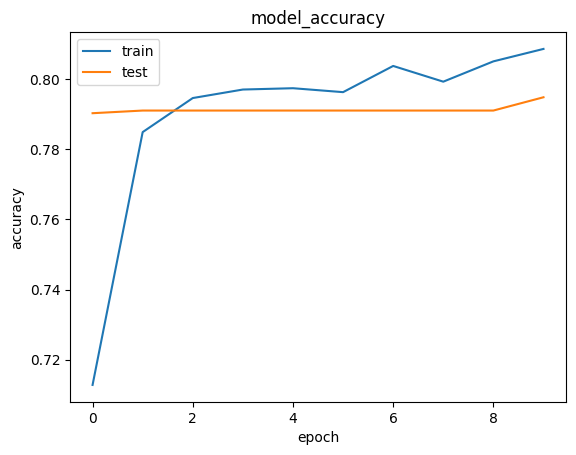

In [15]:
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train' , 'test'] , loc='upper left')
plt.show()

In [16]:
#Predicting the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

#----------------------------------------------------------------------------------------------
# Before applying  y_pred=( y_pred>0.5) , y_pred is the list float number which is basically
# percentage chance of a customer leaving the bank ,lets say first value of y_pred is 0.2.
# means the customer has 20% chance of leaving the bank, now if we apply  y_pred=( y_pred>0.5)
# means we set a threshold value 0.5 (50%)  and if they_pred value is more than
# Making the Confusion Metrix
#-----------------------------------------------------------------------------------------------

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
cm

63/63 [==============================] - 0s 3ms/step


array([[635, 972],
       [104, 289]], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test , y_pred)
print(score)

0.462


In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define your model architecture
classifier = Sequential()
classifier.add(Dense(units=128, activation='relu', input_dim=784))
classifier.add(Dense(units=10, activation='softmax'))

# Compile the model
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Build the model (not necessary if the input shape can be inferred)
# classifier.build(input_shape=(None, 784))

# Now, you can generate a summary of the model
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV


In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Load your dataset or generate sample data
# X, y = load_dataset()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a function to create a Keras model with variable hidden layers and nodes
def create_model(hidden_layers=1, nodes_per_layer=32, activation='relu'):
    model = Sequential()
    for _ in range(hidden_layers):
        model.add(Dense(nodes_per_layer, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define hyperparameters to search over
param_grid = {
    'hidden_layers': [1, 2, 3],         # Number of hidden layers
    'nodes_per_layer': [16, 32, 64],    # Number of nodes per hidden layer
    'activation': ['relu', 'sigmoid']   # Activation function
}

# Create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Perform grid search
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_result.best_score_ * 100))

# Evaluate the model on the test set with the best parameters
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

84/84 [==============================] - 0s 3ms/step


KeyboardInterrupt: 

In [25]:
layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [26]:
grid_result = grid.fit(X_train, y_train)

ValueError: Invalid parameter activation for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(activation=sigmoid)`
Check the list of available parameters with `estimator.get_params().keys()`